In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


### About Dataset

Overview

Issue Description

Customer Personality Analysis involves a thorough examination of a company’s ideal consumer profiles. This process helps businesses gain a deeper understanding of their target market, allowing them to tailor products to meet the distinct needs, preferences, and concerns of various customer groups.

By analyzing customer personality, companies can optimize their product offerings based on the specific characteristics of different customer segments. For example, rather than promoting a new product to the entire customer database, a company can identify which customer group is most likely to purchase the product, and focus marketing efforts specifically on that segment.

Details

Customer Characteristics

Demographic Information

ID: A unique identifier for each customer.

Year_Birth: The year the customer was born.

Education: The highest level of education attained by the customer.

Marital_Status: The customer's relationship status.

Income: The customer's total annual household income.

Kidhome: The number of children in the customer’s household.

Teenhome: The number of teenagers in the customer's household.

Dt_Customer: The date the customer first registered with the company.

Recency: The number of days since the customer’s most recent purchase.

Complain: A value of 1 if the customer lodged a complaint in the last two years, and 0 if they did not.

Product Purchasing Data

MntWines: Total amount spent on wine in the past two years.

MntFruits: Total amount spent on fruits in the past two years.

MntMeatProducts: Total amount spent on meat products in the past two years.

MntFishProducts: Total amount spent on fish products in the past two years.

MntSweetProducts: Total amount spent on sweet items in the past two years.

MntGoldProds: Total amount spent on gold products in the past two years.

Promotional Activity

NumDealsPurchases: The number of purchases made with a discount.

AcceptedCmp1: A value of 1 if the customer accepted the offer in the first campaign, and 0 if they did not.

AcceptedCmp2: A value of 1 if the customer accepted the offer in the second campaign, and 0 if they did not.

AcceptedCmp3: A value of 1 if the customer accepted the offer in the third campaign, and 0 if they did not.

AcceptedCmp4: A value of 1 if the customer accepted the offer in the fourth campaign, and 0 if they did not.

AcceptedCmp5: A value of 1 if the customer accepted the offer in the fifth campaign, and 0 if they did not.

Response: A value of 1 if the customer accepted the offer in the most recent campaign, and 0 if they did not.

Purchase Channels

NumWebPurchases: The number of purchases made through the company’s website.

NumCatalogPurchases: The number of purchases made using a catalogue.

NumStorePurchases: The number of purchases made in physical stores.

NumWebVisitsMonth: The number of visits to the company’s website in the past month.

Objective

The goal is to apply clustering techniques to group customers into distinct segments based on shared characteristics.

In [2]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading and making a copy of the dataset

main_df = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
df = main_df.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### EDA

In [4]:
# Checking the shape of the dataset

df.shape

(2240, 29)

In [5]:
# Finding the basic information regarding dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* Here we have only 3 object type datatype and rest are numerical.

In [6]:
# Finding the number of unique values present in each column

df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

**NOTE** 
* In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why they are not going to contribute anything in the model building. So we can drop them.  

In [7]:
# Checking if any NaN is present in column or not

df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

* Income column have some missing value in it so we will need to fill it by by either mean or median.

<AxesSubplot:>

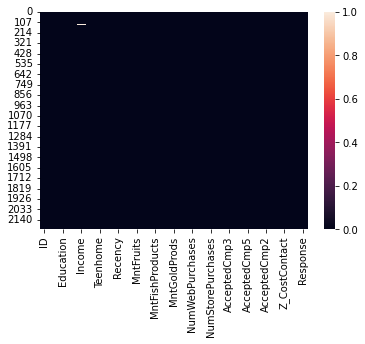

In [8]:
# Checking for null value using heatmap

sns.heatmap(df.isnull())

In [9]:
# Dropping columns because they will not contribute anything in model building

df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


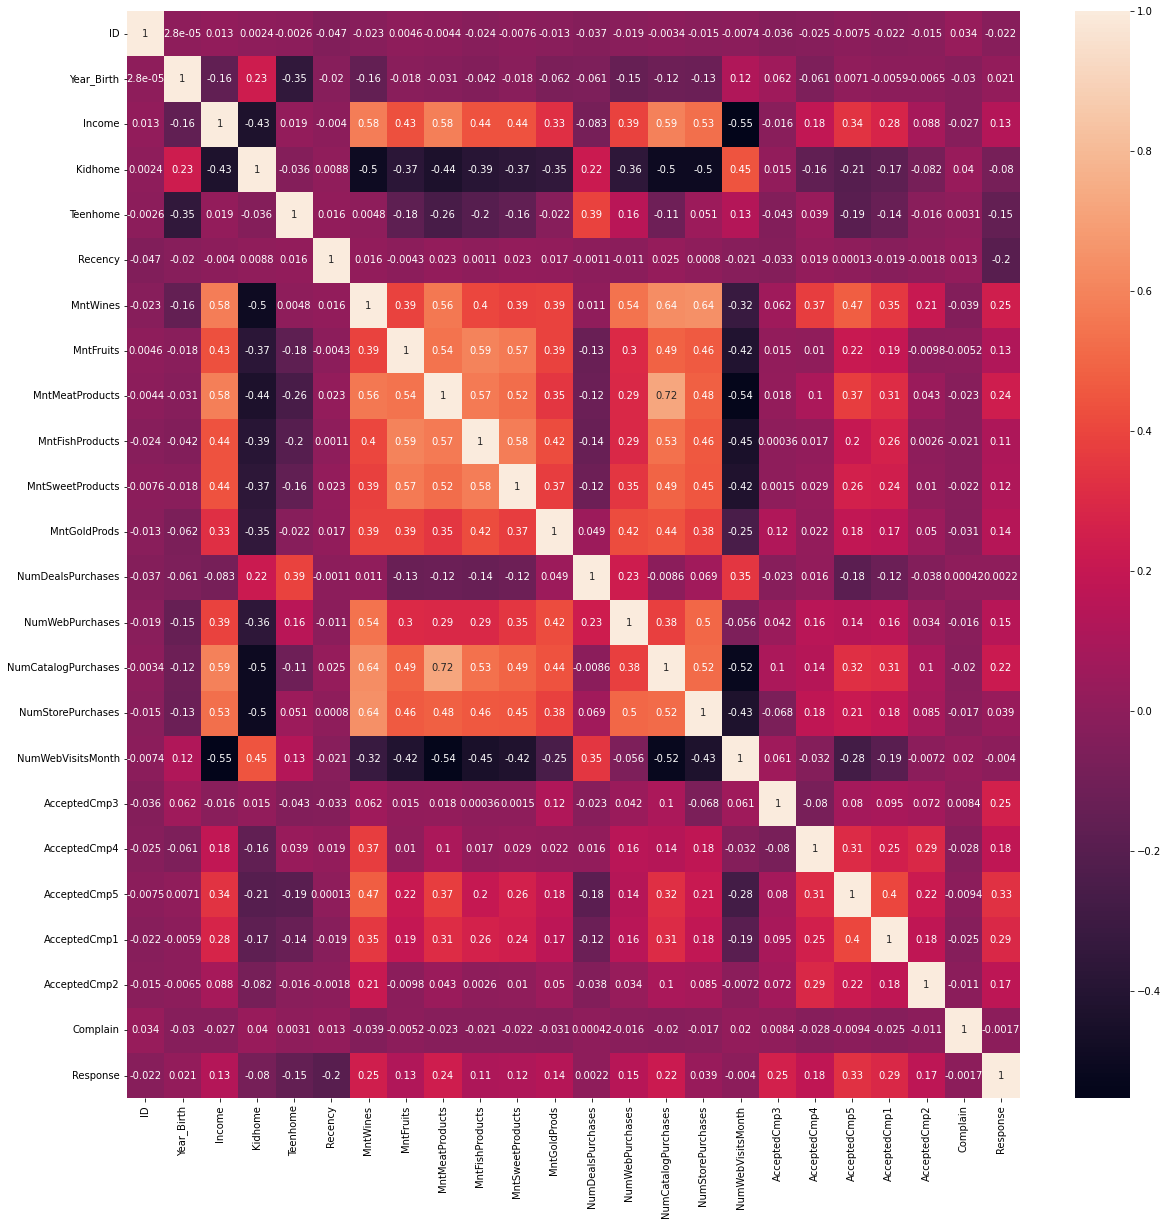

In [10]:
# Finding the correlation between the feature column

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

* No two columns are too much correlated with each other so we can't drop any column on the basis of correlation.

In [11]:
# Checking for correlation by unstacking data

corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[24:50:2]

MntMeatProducts      NumCatalogPurchases    0.723827
NumStorePurchases    MntWines               0.642100
NumCatalogPurchases  MntWines               0.635226
MntFruits            MntFishProducts        0.594804
Income               NumCatalogPurchases    0.589162
                     MntMeatProducts        0.584633
MntFishProducts      MntSweetProducts       0.579870
Income               MntWines               0.578650
MntFishProducts      MntMeatProducts        0.568402
MntSweetProducts     MntFruits              0.567164
MntMeatProducts      MntWines               0.562667
Income               NumWebVisitsMonth      0.553088
MntMeatProducts      MntFruits              0.543105
dtype: float64

* It is used to calculate how one variable is correlated/ dependent on other variable.
* Extreme values signify high correlation.
* Multicollinear variables with correlation more than a threshold are usually dropped from the dataset.

### Preprocessing of the dataset

In [12]:
# Filling the missing value in the income my mean

df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any() 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [14]:
# Checking number of unique categories present in the "Marital_Status"

df['Marital_Status'].value_counts()  

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [15]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

* In the above cell we are grouping 'Married', 'Together' as "relationship" 
* Whereas 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' as "Single"

In [16]:
# Count of different values present in Marital_Status

df['Marital_Status'].value_counts()  

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [17]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [18]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,0,0,1617,1,25
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,0,2,27,0,6
2,4141,1965,Graduation,relationship,71613.0,21-08-2013,26,0,0,776,0,21
3,6182,1984,Graduation,relationship,26646.0,10-02-2014,26,0,1,53,0,8
4,5324,1981,PhD,relationship,58293.0,19-01-2014,94,0,1,422,0,19


In [19]:
# Adding a column "Age" in the dataframe

df['Age'] = 2015 - df["Year_Birth"]

In [20]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [21]:
# Changing category into UG and PG only

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [22]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [23]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(2240, 9)

### Visualization

In [24]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Education")
fig.show()

In [25]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Marital_Status")
fig.show()

**Less number of single customer**

In [26]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [27]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()

In [28]:
fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()

In [29]:
fig = px.histogram (df, x = "Age",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [30]:
fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [31]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.4, template = "gridon")
fig.show ()

**35% of the customer are single whereas more 64% are in relationship.**

In [32]:
fig =  px.pie (df, names = "Education", hole = 0.4, template = "plotly_dark")
fig.show ()

** More than 97% customer are from PG background. and Approx. 2% are from UG.

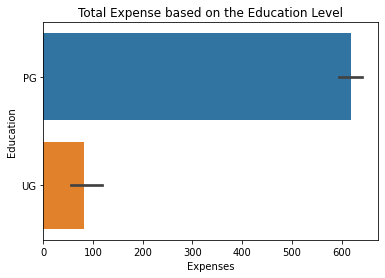

In [33]:
sns.barplot(x = df['Expenses'],y = df['Education']);
plt.title('Total Expense based on the Education Level');

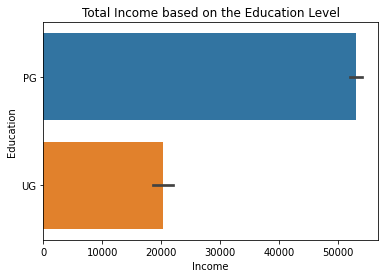

In [34]:
sns.barplot(x = df['Income'],y = df['Education']);
plt.title('Total Income based on the Education Level');

In [35]:
df.describe()

,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.950446,605.798214,0.446875,14.862054,46.194196,538.043304
std,25037.797168,0.751803,602.249288,0.890543,7.677173,11.984069,232.229893
min,1730.000000,0.000000,5.000000,0.000000,0.000000,19.000000,26.000000
25%,35538.750000,0.000000,68.750000,0.000000,8.000000,38.000000,366.750000
50%,51741.500000,1.000000,396.000000,0.000000,15.000000,45.000000,539.000000
75%,68289.750000,1.000000,1045.500000,1.000000,21.000000,56.000000,711.250000
max,666666.000000,3.000000,2525.000000,5.000000,44.000000,122.000000,1089.000000


<AxesSubplot:>

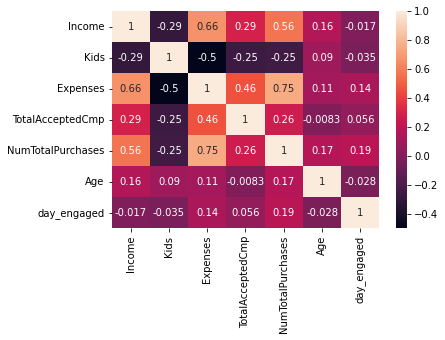

In [36]:
sns.heatmap(df.corr(), annot=True)

In [37]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status']


In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [39]:
df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

### Label Encoding

In [40]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [41]:
df1 = df.copy()

### Standardization 

In [42]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [43]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157171,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.976745
1,-0.157171,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.667011
2,-0.157171,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.172468
3,-0.157171,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.925433
4,-0.157171,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.822831


### Elbow Method 

In [44]:
from sklearn.cluster import KMeans

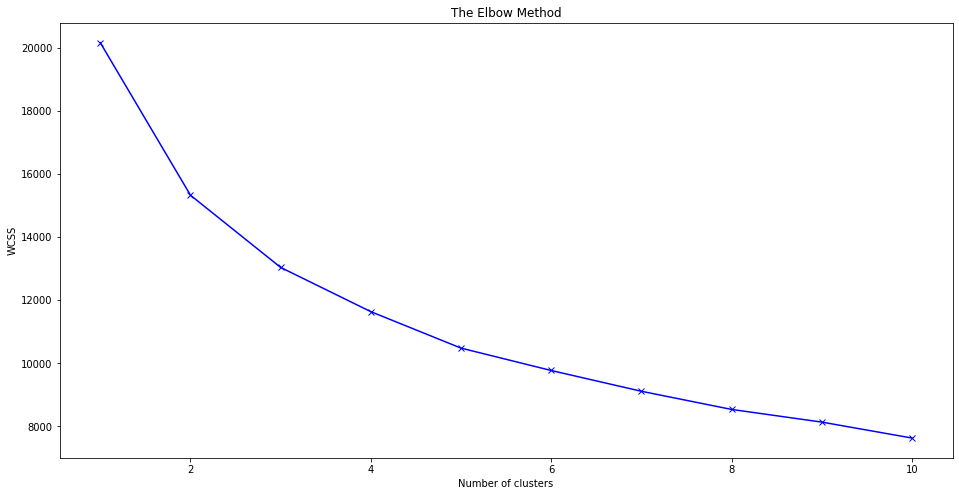

In [45]:
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**As it is not very clear from the elbow method that which value of K to choose.**

### Silhouette Score

In [46]:
from sklearn.metrics import silhouette_score 

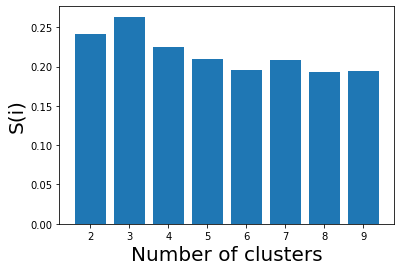

In [47]:

silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

**Here we are using Silhouette score to measure the value of K**

In [48]:
silhouette_scores

[0.24144443337570404,
 0.2633691981378332,
 0.22547869857815794,
 0.20978761291738096,
 0.1961315623922937,
 0.2084329272267332,
 0.19347211267843092,
 0.19424380032403674]

In [49]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


### Model Building

In [50]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)


# Appending those cluster value into main dataframe (without standard-scalar)

df['cluster'] = pred + 1

In [51]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,cluster
0,0,0,58138.0,0,1617,1,25,58,997,2
1,0,0,46344.0,2,27,0,6,61,151,1
2,0,1,71613.0,0,776,0,21,50,498,2
3,0,1,26646.0,1,53,0,8,31,91,1
4,0,1,58293.0,1,422,0,19,34,347,1


In [52]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157171,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.976745
1,-0.157171,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.667011
2,-0.157171,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.172468
3,-0.157171,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.925433
4,-0.157171,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.822831


In [53]:
df['Education'].value_counts()

0    2186
1      54
Name: Education, dtype: int64

* 0 means PG and 1 means UG
* There are very less customer from UG background

### Clustering 

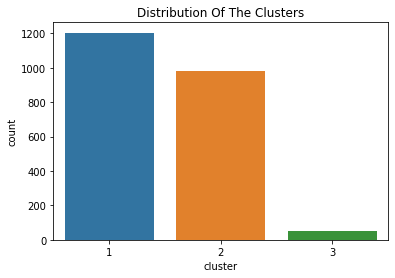

In [54]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

**Note :-**

**As we can see here that weightage of customer are more in cluster 1 as compare to other.**

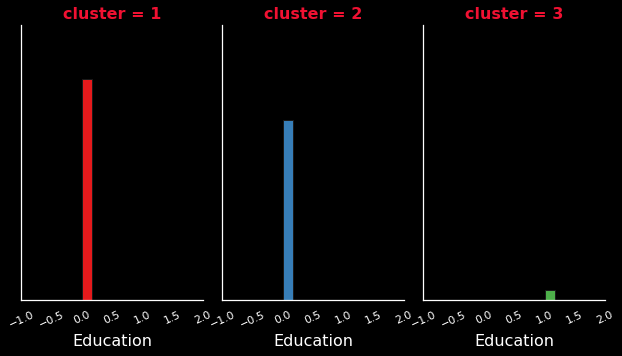

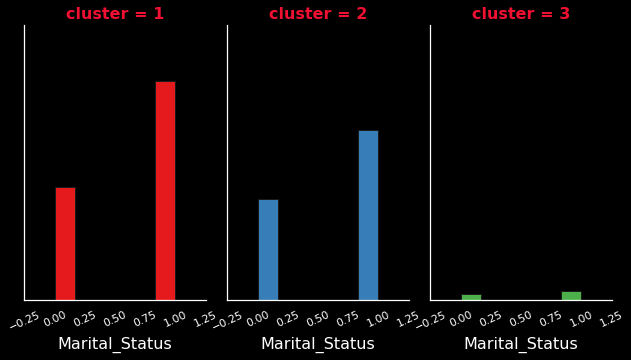

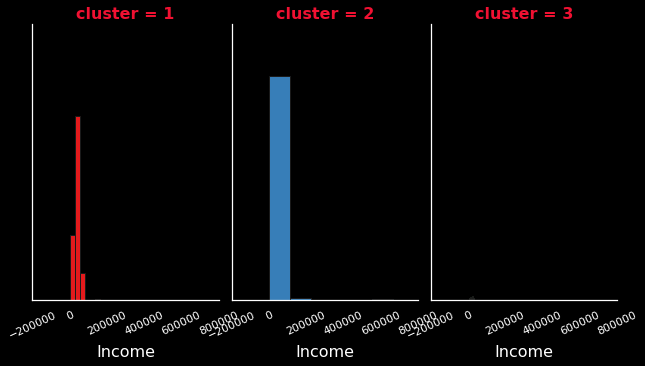

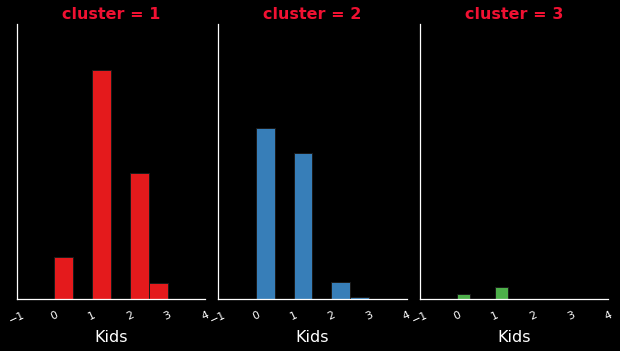

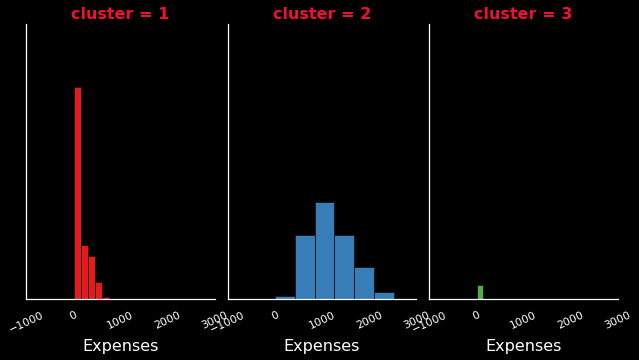

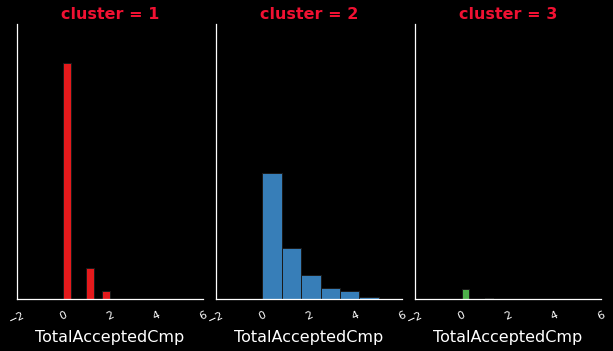

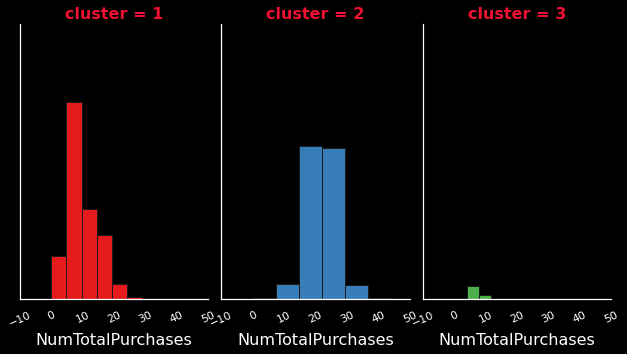

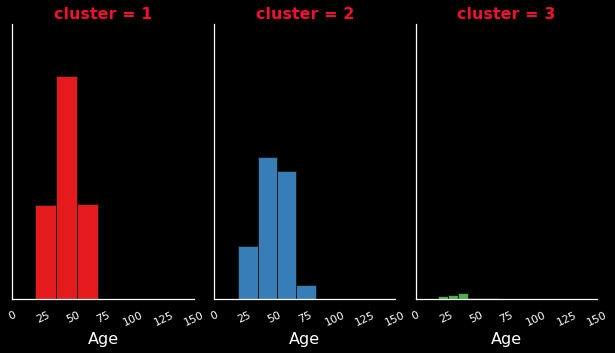

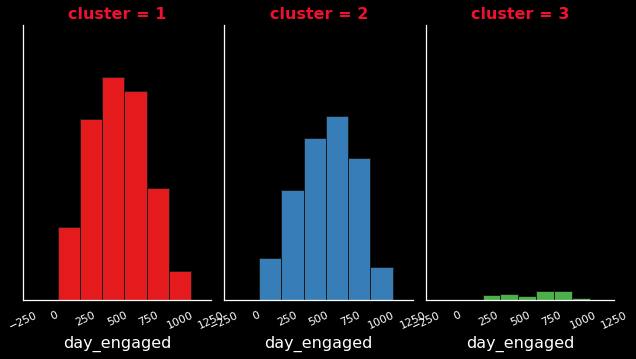

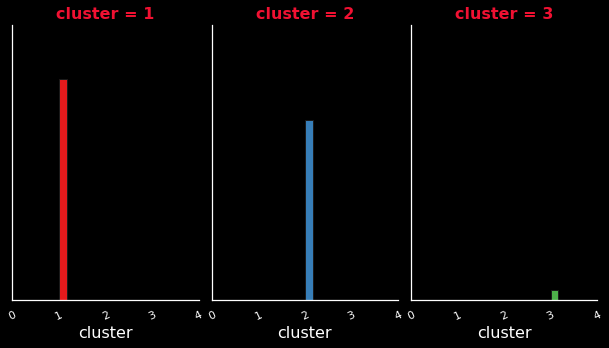

In [55]:
# Clusters interpretation 
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in df:
    diag = sns.FacetGrid(df, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

### Report 

# Customer Segmentation Based on Activity Levels

Based on the customer analysis, we can categorize customers into three distinct groups:

1. **Highly Engaged Customers** – These customers belong to the first cluster.
2. **Moderately Engaged Customers** – These customers belong to the second cluster.
3. **Least Engaged Customers** – These customers belong to the third cluster.

---

## Profile of Highly Engaged Customers

### Education Level
- Highly engaged customers typically have a postgraduate education.

### Marital Status
- The number of people in relationships is roughly twice as high as those who are single.

### Income
- These customers tend to have slightly lower income compared to moderately engaged customers.

### Children
- They generally have more children compared to other segments, with an average of one child per household.

### Spending Habits
- Their spending is lower than that of moderately engaged customers, with an average expenditure between 100-200 units.

### Age Range
- These customers are between the ages of 25 and 75, with the majority falling between 40 and 50 years old.

### Customer Loyalty
- Highly engaged customers have been with the company for a longer duration, indicating higher loyalty.

---

## Profile of Moderately Engaged Customers

### Education Level
- Moderately engaged customers also tend to have a postgraduate background.

### Marital Status
- Those in relationships slightly outnumber single individuals in this group.

### Income
- The income of moderately engaged customers is typically higher than that of both highly engaged and least engaged customers.

### Children
- They have fewer children on average, with many customers in this segment having no children.

### Spending Habits
- Their spending is higher than highly engaged customers, with an average expenditure between 500-2000 units.

### Age Range
- The age of these customers ranges from 25 to 75, with the majority falling between 35 and 60 years old.

### Customer Loyalty
- Moderately engaged customers are somewhat less loyal than highly engaged customers, having been with the company for a slightly shorter period.

---

## Profile of Least Engaged Customers

### Education Level
- Least engaged customers generally have an undergraduate background.

### Marital Status
- The number of people in relationships is roughly equal to the number of single individuals in this segment.

### Income
- These customers have very low or negligible income.

### Children
- Only a small portion of these customers have children.

### Spending Habits
- Their spending is minimal or negligible compared to other groups.

### Age Range
- These customers are typically younger, between 15 and 30 years old.

### Customer Loyalty
- Least engaged customers have been with the company for a much shorter period, showing lower levels of long-term commitment.

---
